## Predict the Average Rating of Books

In this project, we have worked on a books dataset published by Goodreads. The dataset comprised information/data on the following factors: Book ID, Book title, Authors and Co-Authors, Average rating, ISBN and ISBN 13, Language, Number of pages, Number of ratings count and Text reviews count, Publication date and Publisher.

A book lover before purchasing a book may prefer to consider one or more of the above mentioned factors with average rating, author, publisher being the most important ones.

With the onset of digital revolution, Goodreads as a platform is very popular amongst book readers. They prefer to look at the average rating and also the reviews provided by others.

For book readers like us, alongwith authors, publishers also play an important role. Publishers like Penguin, Harper Collin have always been associated with good books and hence play a very important role in determining the popularity of a book.

The objective behind building the model was to predict the average rating of a book based on various factors which play an important role in the determination.

This model definitely does not judge the books by their cover but by number of pages, language, publisher and author etc.

## Key Findings from the Data

From the Goodreads books dataset, we seek to find out the following:

1. What is average rating for most of the books?
2. In which year maximum books were published?
3. Does Publication date, number of pages, text reviews count and ratings count really have an impact on the rating of the books?
4. Who are the top 20 authors and publishers?
5. In which language are most of the books read?

Let's dive into the dataset to gain insights and build a model to predict average rating.

### 1. Loading Libraries with Installations

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Load the Goodreads Books Dataset.

In [39]:
cols = ['bookID' ,'title',  'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', 'num_pages', 'ratings_count',      
        'text_reviews_count', 'publication_date', 'publisher',  'coauthor']
df = pd.read_csv('books_data.csv', names=cols, skiprows=1,engine='python', quotechar=',', on_bad_lines='warn')

Note, we have used quoting charcter ',' to prevent quoting issues. The engine is python and it is used when number of columns are variable.

### 3. Initial Analysis of the Data

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  coauthor            4 non-null      object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


We have analyzed the datatype of respective columns. All are categorical variables, except book ID, ratings count and text reviews count.

In [41]:
# Check the top 5 rows
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,coauthor
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,None
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,None
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,None
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,None
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,None


In [42]:
#Summary Statistics - Non-Categorical
df.describe().applymap('{:,.2f}'.format)

,bookID,ratings_count,text_reviews_count
count,"11,127.00","11,127.00","11,127.00"
mean,"21,310.94","17,936.49",541.86
std,"13,093.36","112,479.43","2,576.17"
min,1.00,0.00,0.00
25%,"10,287.00",104.00,9.00
50%,"20,287.00",745.00,47.00
75%,"32,104.50","4,993.50",237.50
max,"45,641.00","4,597,666.00","94,265.00"


Here, we analyze the summary statistics of only Quantitative/Non-Categorical variables

In [43]:
#Summary Statistics - Categorical
df.describe(include='object')

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,publication_date,publisher,coauthor
count,11127,11127,11127,11127,11127,11127,11127,11127,11127,4
unique,10352,6643,213,11126,11127,31,999,3682,2295,4
top,The Brothers Karamazov,Stephen King,4.00,3.58,9780439785969,eng,288,10/1/2005,Vintage,Harvard University Press
freq,9,40,219,2,1,8908,230,56,318,1


Here, we analyze the summary statistics of only Qualitative/Categorical variables.

The dataset comprises 11127 rows. We observe that no columns have missing data. But, the column named co-author has only 4 rows. In the following section, we will deep dive into the co-author column.

### 4. Data Cleaning

The dataset comprises 13 columns. But we notice, the 13th column 'Co-Author' has only 4 rows whereas all other columns have 11127 rows. Let's examine further.

In [44]:
dirty = df.loc[~df['coauthor'].isnull(), : ]

In [45]:
dirty

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,coauthor
3348,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,0674842111,9780674842113,en-US,236,61,6,4/20/2004,Harvard University Press
4702,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9781593600112,eng,400,26,4,4/6/2004,Cold Spring Press\t
5877,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9781563841552,eng,342,38,4,1/15/1999,Huntington House Publishers
8979,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0.00,0851742718,9780851742717,eng,49,0,0,5/1/1977,Brown Son & Ferguson Ltd.


The average rating for these four rows is authors' name.

In [46]:
coauthor = dirty.loc[:, 'average_rating']
coauthor = coauthor.rename("author2")

We will shift every other column to the left and we call this right side of data frame. 

In [47]:
right = dirty.loc[:, 'average_rating':'coauthor'].shift(periods=-1, axis=1)

All the other columns before author and taken as left. 

In [48]:
left = dirty.loc[:, :'authors']

We will merge the co author with author.  

In [49]:
left['authors'] = left['authors'] + coauthor

The left side will look like this. 

In [50]:
left

,bookID,title,authors
3348,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner Jr./Sam B. Warner
4702,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net one o...
5877,22128,Patriots (The Coming Collapse),James Wesley Rawles
8979,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown Son & Ferguson


The Right side

In [51]:
right

,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,coauthor
3348,3.58,0674842111,9780674842113,en-US,236,61,6,4/20/2004,Harvard University Press,NaN
4702,3.58,1593600119,9781593600112,eng,400,26,4,4/6/2004,Cold Spring Press\t,NaN
5877,3.63,156384155X,9781563841552,eng,342,38,4,1/15/1999,Huntington House Publishers,NaN
8979,0.00,0851742718,9780851742717,eng,49,0,0,5/1/1977,Brown Son & Ferguson Ltd.,NaN


We will combine them. and call it clean. 

In [52]:
clean = pd.concat([left,  right, coauthor], axis=1)

In [53]:
clean = clean.drop(columns= ['coauthor'])

In [54]:
clean

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,author2
3348,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner Jr./Sam B. Warner,3.58,0674842111,9780674842113,en-US,236,61,6,4/20/2004,Harvard University Press,Jr./Sam B. Warner
4702,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net one o...,3.58,1593600119,9781593600112,eng,400,26,4,4/6/2004,Cold Spring Press\t,one of the founding members of this Tolkien w...
5877,22128,Patriots (The Coming Collapse),James Wesley Rawles,3.63,156384155X,9781563841552,eng,342,38,4,1/15/1999,Huntington House Publishers,Rawles
8979,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown Son & Ferguson,0.00,0851742718,9780851742717,eng,49,0,0,5/1/1977,Brown Son & Ferguson Ltd.,Son & Ferguson


We will replace the dirty rows with this newly created clean data frame. 

In [55]:
df.loc[clean.index, :] = clean

While examining the dataset, we found out that for the 4 rows under dicussion, there was a shift of data by 1 column. This means that some of the authors had shifted to the 'Average Rating' column. The average ratings for the respective rows had shifted to the 'ISBN' column and so forth. Hence, we had a 13th column which had publishers' name due to this data shift.

We have corrected this above and the dataframe 'df' is now clean.

### 5. Removing the Columns

We will remove 'coauthor', 'bookID', 'isbn', 'isbn13' as we will not consider them in building the Average Rating Prediction Model.

In [57]:
df = df.drop(columns= ['coauthor', 'bookID', 'isbn', 'isbn13'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               11127 non-null  object
 1   authors             11127 non-null  object
 2   average_rating      11127 non-null  object
 3   language_code       11127 non-null  object
 4   num_pages           11127 non-null  object
 5   ratings_count       11127 non-null  int64 
 6   text_reviews_count  11127 non-null  object
 7   publication_date    11127 non-null  object
 8   publisher           11127 non-null  object
dtypes: int64(1), object(8)
memory usage: 782.5+ KB


### 6. Changing the Data type of Variables

After analysing, we noticed that the datatype of the quantitative/non-categorical variables such as average average_rating, num_pages, text_reviews_count is object. The publication_date which is a date is also object.

For building a datset suitable for predictive modelling, we will change the data type of the variables to numeric.

In [60]:
#Changing the data type of the variables to Float/Int
df['average_rating'] = df['average_rating'].astype(np.float32)
df['num_pages'] = df['num_pages'].astype(np.int32)
df['ratings_count'] = df['ratings_count'].astype(np.int32)
df['text_reviews_count'] = df['text_reviews_count'].astype(np.int32)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float32
 3   language_code       11127 non-null  object 
 4   num_pages           11127 non-null  int32  
 5   ratings_count       11127 non-null  int32  
 6   text_reviews_count  11127 non-null  int32  
 7   publication_date    11127 non-null  object 
 8   publisher           11127 non-null  object 
dtypes: float32(1), int32(3), object(5)
memory usage: 608.6+ KB


Checking if the data is clean and there are no unwanted data and columns

In [62]:
df.iloc[3348, :]

title                 Streetcar Suburbs: The Process of Growth in Bo...
authors                               Sam Bass Warner Jr./Sam B. Warner
average_rating                                                     3.58
language_code                                                     en-US
num_pages                                                           236
ratings_count                                                        61
text_reviews_count                                                    6
publication_date                                              4/20/2004
publisher                                      Harvard University Press
Name: 3348, dtype: object

### 7. Converting Dates

In this section, we convert the data type of publication date to datetime as the name of the variable suggests. However, during analysis, it was detected that 2 dates were unfeasible. For example: November and June had 31 days instead of 30. We corrected the respective dates and assumed that it will be the 30th day of the month under consideration.

In [68]:
dates = pd.to_datetime(df.publication_date, format="%m/%d/%Y", errors="coerce")

In [69]:
dates[dates.isnull()]

8180    NaT
11098   NaT
Name: publication_date, dtype: datetime64[ns]

The following 2 rows contain values that are not feasible dates as June and November does not have 31 days

In [70]:
#1
df.publication_date[8180]

'11/31/2000'

In [71]:
#2
df.publication_date[11098]

'6/31/1982'

Correction the dates and parsing it

In [72]:
df.iloc[8180, 7] = '11/30/2000' 
df.iloc[11098, 7] = '6/30/1982'

df.publication_date = pd.to_datetime(df.publication_date, format="%m/%d/%Y", errors="raise")

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               11127 non-null  object        
 1   authors             11127 non-null  object        
 2   average_rating      11127 non-null  float32       
 3   language_code       11127 non-null  object        
 4   num_pages           11127 non-null  int32         
 5   ratings_count       11127 non-null  int32         
 6   text_reviews_count  11127 non-null  int32         
 7   publication_date    11127 non-null  datetime64[ns]
 8   publisher           11127 non-null  object        
dtypes: datetime64[ns](1), float32(1), int32(3), object(4)
memory usage: 608.6+ KB


### 8. Exploratory Data Analysis with Charts and Tables

We analyze the data a bit more to understand the pattern and relationship between variables. This exploratory data analysis through charts and tables will help us gain valuable insights about the dataset.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


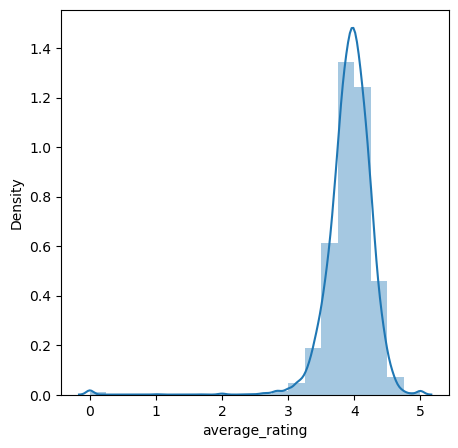

In [75]:
#Distribution Graph
plt.figure(figsize=(5,5))
rating= df.average_rating
sns.distplot(rating, bins=20)
plt.show()

We see that the distribution curve for 'Average Rating' is negatively skewed. This implies that most of the average ratings are concentrated between 3 to 5. However, as per the above average rating of 5 is rare.

#### Books with the highest average rating of 5.0

Looking at the just the top 10 books doesnt make sense. As there are more than 10 books with highest average rating i.e 5.0. Let's pull out a list of books with the average rating of 5.0

In [77]:
# Let's look at the top 10 rated books
df.sort_values('average_rating',ascending=False)
#Check the max average rating
df["average_rating"].describe()

count    11127.000000
mean         3.933630
std          0.352446
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: average_rating, dtype: float64

Here, we see for books the maximum average rating is 5.0. Now, we draw a list of the books with rating 5.0

In [78]:
books_highAverageRating=df.loc[(df.loc[:,'average_rating']==5),'title']
list_book=pd.DataFrame(books_highAverageRating).sort_values('title')
list_book.reset_index()

,index,title
0,10266,Bill Gates: Computer Legend (Famous Lives)
1,4935,Bulgakov's the Master and Margarita: The Text ...
2,5650,Colossians and Philemon: A Critical and Exeget...
3,624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...
4,6778,Delwau Duon: Peintiadau Nicholas Evans = Symph...
5,8547,Fanning the Flame: Bible Cross and Mission
6,9897,His Princess Devotional: A Royal Encounter Wit...
7,855,Literature Circle Guide: Bridge to Terabithia:...
8,1243,Middlesex Borough (Images of America: New Jersey)
9,9286,Oliver Wendell Holmes in Paris: Medicine Theo...


There are 22 books with maximum average rating (5.0).

#### Lets find out the Top 20 most read books based on ratings count -The Popular Books among readers

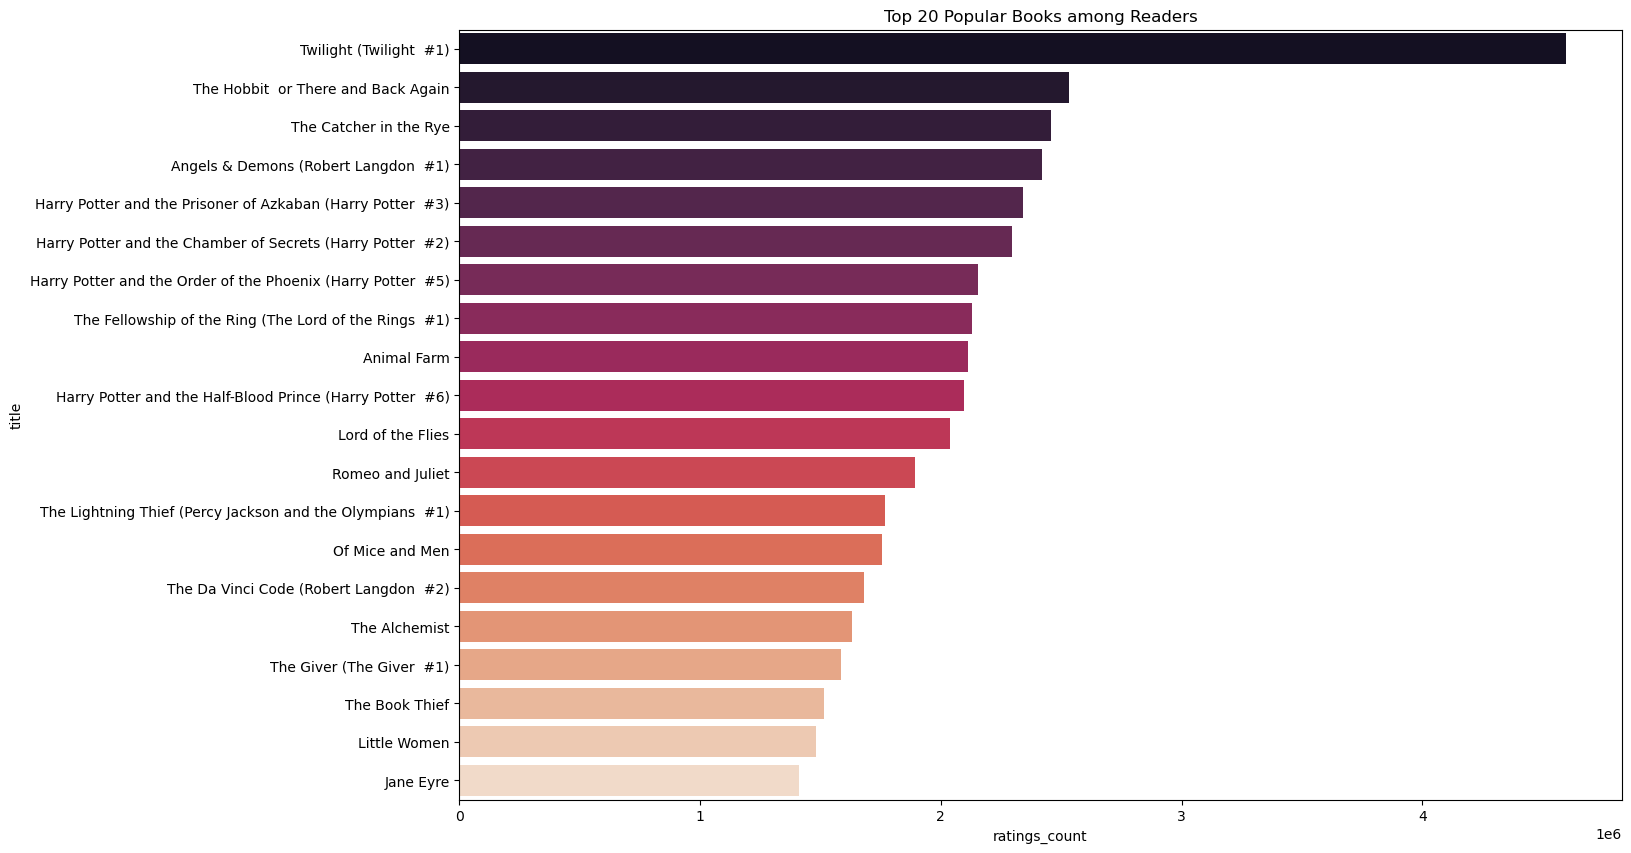

In [79]:
# Let's look at the top 20 rated books
top_20 = df.sort_values('ratings_count', ascending=False).head(20).set_index('title')

plt.figure(figsize=(15,10))
sns.barplot(x=top_20['ratings_count'], y=top_20.index, palette='rocket').set(title='Top 20 Popular Books among Readers');

Its interesting to note that the list of popular books 20 based on ratings count is completely different from the list of books that have the higest average rating of 5.0. Let's check what is the average rating of the above 20 books

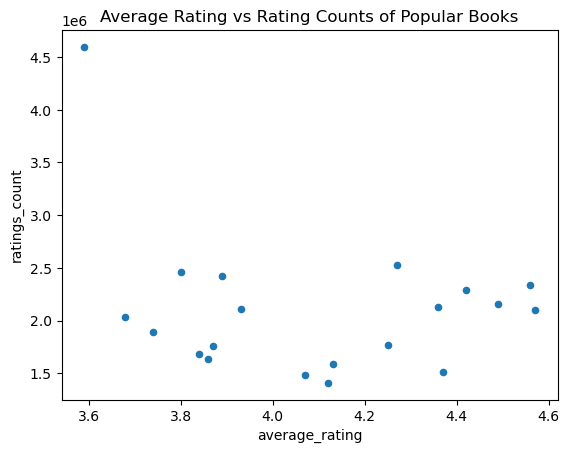

In [80]:
#Scatter plot for Average Ratinga and Ratings Count of Top 20 Popular Books
top_20.plot.scatter(x='average_rating', y='ratings_count', title='Average Rating vs Rating Counts of Popular Books');

1e6 represents million. The popular books have a comparatively high rating ranging between 3.6 to 4.6.

#### The language distribution of the books

In the pie chart provided below, we try to understand what are the top 5 languages in which the books in the dataset are published.